In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import arff
import time
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import StandardScaler
from numpy.linalg import inv
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

 This is a varing-coefficient model

 theta_t = A @ theta_t1 + w_t
 
 y_t = C @ theta_t + v_t

 theta -> regression coefficients
 C -> Explanatory variables

 Note that C includes one more column of constant 1, in addition to the initial X_train

In [10]:
df_long = pd.read_excel("C:/Users\liuwe\Desktop\Daily\Research\ENEOS\Data_3/New_LSR/211213_根岸LSR平衡還流沸点データ.xlsx",
                     sheet_name='DataBase(432)', header=3, index_col=0, skiprows=range(4,5))
df_short= pd.read_excel("C:/Users\liuwe\Desktop\Daily\Research\ENEOS\Data_3/New_LSR/211213_根岸LSR平衡還流沸点データ.xlsx",
                     sheet_name='DataBase(122)', header=3, index_col=0, skiprows=range(4,5))
df_train, df_test = df_long.iloc[:315,:], df_short
y_train, date_train = df_train.pop('bp').values, df_train.pop('Date').values
y_test, date_test = df_test.pop('bp').values, df_test.pop('Date')
num = 12
X_train, X_test = df_train.iloc[:,:num], df_test.iloc[:,:num]
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
print(X_train.shape, X_test.shape)

(315, 13) (122, 13)


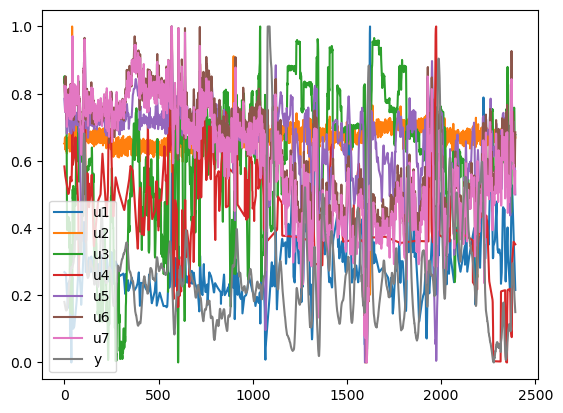

In [27]:
# Debutanizer Column data set
df = pd.read_csv('C:/Users\liuwe\Desktop\Daily\Research\Dataset\Debutanizer Column\debutanizer_data.txt', 
                 delimiter='\s+', header=None, skiprows=3, names=['u1','u2','u3','u4','u5','u6','u7','y'],)
df.plot() # already normalized data
y_column = df.pop('y').values
X_column = df.values
split = 2000
X_train, X_test = X_column[:split,:], X_column[split:,:]
y_train, y_test = y_column[:split], y_column[split:]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

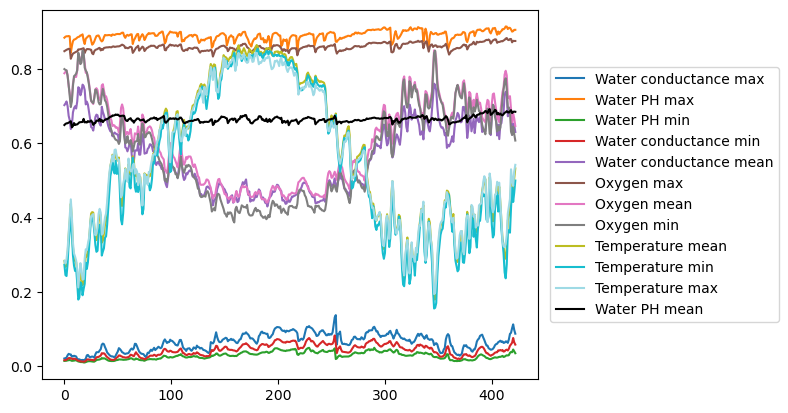

In [3]:
# Water quality prediction dataset
import scipy.io
mat_data = scipy.io.loadmat('C:/Users\liuwe\Desktop\Daily\Research\Dataset\Water quality prediction/water_dataset.mat')

columns = ['Water conductance max', 'Water PH max', 'Water PH min',
           'Water conductance min', 'Water conductance mean', 'Oxygen max',
           'Oxygen mean', 'Oxygen min', 'Temperature mean',
           'Temperature min', 'Temperature max']
tr_length, te_length = mat_data['X_tr'][0][:].shape[0], mat_data['X_te'][0][:].shape[0]
df_variables_tr = pd.DataFrame(index=range(tr_length), columns=columns)
df_variables_te = pd.DataFrame(index=range(te_length), columns=columns)
# y_tr, y_te = mat_data['Y_tr'][34,:], mat_data['Y_te'][34,:]
y_train, y_test = mat_data['Y_tr'].mean(axis=0), mat_data['Y_te'].mean(axis=0)

for i in range(tr_length):
    # mat_data['X_tr'][0][i][34,:] # The 35th location, forming a single group
    # mat_data['X_tr'][0][i].mean(axis=0) # mean values of all 37 locations
    df_variables_tr.iloc[i,:] = mat_data['X_tr'][0][i].mean(axis=0)

for i in range(te_length):
    # mat_data['X_te'][0][i][34,:] # The 35th location, forming a single group
    # mat_data['X_te'][0][i].mean(axis=0) # mean values of all 37 locations
    df_variables_te.iloc[i,:] = mat_data['X_te'][0][i].mean(axis=0)

X_train, X_test = df_variables_tr.values.astype(float), df_variables_te.values.astype(float)

df_variables_tr.plot(colormap=plt.get_cmap('tab20'))
plt.plot(y_train, label='Water PH mean', c='k')
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))


In [21]:
# Melt index prediction
MI1 = pd.read_csv('C:/Users\liuwe\Desktop\Daily\Research\Dataset\Melt Index\M1.txt',header=0,index_col=0,sep='\t')
MI2 = pd.read_csv('C:/Users\liuwe\Desktop\Daily\Research\Dataset\Melt Index\M2.txt',header=0,sep='\t')
MI3 = pd.read_csv('C:/Users\liuwe\Desktop\Daily\Research\Dataset\Melt Index\M3.txt',header=0,sep='\t')
MI1 = MI1.reset_index(drop=True)
raw_data = pd.concat([MI1.iloc[:,:12], MI2.iloc[:,:8], MI3], axis=1)
raw_data.drop(314, inplace=True)
target = raw_data.pop(raw_data.columns[-1]).values
X_train, X_test, y_train, y_test = train_test_split(raw_data.values[:,12:], target, train_size=249, shuffle=False)
# Already in the range of 0~1 and include a constant column
print(X_train.shape, X_test.shape)

(249, 17) (81, 17)


In [30]:
# Gas Turbine CO and NOx emission data set
df_gas = pd.read_csv('C:/Users\liuwe\Desktop\Daily\Research\Dataset\Gas Turbine CO and NOx Emission Data Set\gt_2012.csv')
resample_fre = round(df_gas.shape[0]/365)
df_gas_day = df_gas[::20].iloc[:365,:].reset_index(drop=True)
y_NO = df_gas_day.pop('NOX').values
y_CO = df_gas_day.pop('CO').values
X_gas = df_gas_day.values
split = 300
X_train, X_test = X_gas[:split,:], X_gas[split:,:]
y_train, y_test = y_CO[:split], y_CO[split:]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)


In [17]:
# Sulfur recovery unit dataset
dataset = arff.load(open('C:/Users\liuwe\Desktop\Daily\Research\Dataset\Sulfur Recovery Unit\Sulfur.arff'))
data = pd.DataFrame(dataset['data'])
features, target  = data.iloc[:, :5], data.iloc[:, 5:]
features_lagged = pd.concat([features, 
                             features.shift(5),
                             features.shift(7),
                             features.shift(9)], axis=1)
features_lagged, target = features_lagged.iloc[9:,:], target.iloc[9:,:]
X_sulfur, y_sulfur = features_lagged.values, target.iloc[:,1].values
X_train, X_test = X_sulfur[:7000,:], X_sulfur[7000:,:]
y_train, y_test = y_sulfur[:7000], y_sulfur[7000:]

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# X_train = sm.add_constant(X_train)
# X_test = sm.add_constant(X_test)

In [3]:
def mae(y,yh):
    return np.mean(np.abs(y-yh))
def check_symmetric(a, rtol=1e-05, atol=1e-08):
    chol_a = np.linalg.cholesky(a)
    return np.allclose(a, a.T, rtol=rtol, atol=atol)

In [4]:
class Parameters:
    def __init__(self, init_theta, init_P, A, Q, R) -> None:
        self.theta0 = init_theta
        self.P0 = init_P
        self.A = A
        self.Q = Q
        self.R = R

class KFResults:
    def __init__(self, pred, prediction_cov, filter,
     filter_cov, prior, prior_cov, K, A) -> None:
        self.pred = pred
        self.prediction_cov = prediction_cov
        self.filter = filter
        self.filter_cov = filter_cov
        self.prior = prior
        self.prior_cov = prior_cov
        self.kalman_gain = K
        self.A = A

class KSResults:
    def __init__(self, smooth, smooth_cov, smooth_lagcov) -> None:
        self.smooth = smooth
        self.smooth_cov = smooth_cov
        self.smooth_lagcov = smooth_lagcov

In [5]:
def KalmanFilter(X, y, parameters):
    
    # Matrix dimension
    k_states = X.shape[1]
    nobs = X.shape[0] 

    # Allocate memory for all kinds of process variables
    filter = np.zeros((k_states, nobs))
    filter_cov = np.zeros((k_states, k_states, nobs))
    prior = np.zeros((k_states, nobs))
    prior_cov = np.zeros((k_states, k_states, nobs))
    pred = np.zeros((1, nobs))
    pred_v = np.zeros((1, 1, nobs))
    A = parameters.A

    # Initialization - the first iteration
    mu0 = parameters.theta0 # Initial guess of the states
    V0 = parameters.P0      # Uncertainty about the initial guess
    x = X[None,0,:]
    K = V0 @ x.T @ inv(x @ V0 @ x.T + parameters.R)
    filter[:,0,None] = mu0 + K @ (y[0] - x @ mu0)
    filter_cov[:,:,0] = (np.eye(k_states) - K @ x) @ V0
    prior[:,0,None] = A @ filter[:,0,None]
    prior_cov[:,:,0] = A @ filter_cov[:,:,0] @ A.T + parameters.Q
    pred[:,0] = x @ prior[:,0,None]
    pred_v[:,:,0] = x @ prior_cov[:,:,0] @ x.T + parameters.R
    


    for t in range(1, nobs):
        x = X[None,t,:]

        # Kalman gain and correction based on the observation
        K = prior_cov[:,:,t-1] @ x.T @ inv(x @ prior_cov[:,:,t-1] @ x.T + parameters.R)
        filter[:,t,None] = prior[:,t-1,None] + K @ (y[t] - x @ prior[:,t-1,None])
        filter_cov[:,:,t] = (np.eye(k_states) - K @ x) @ prior_cov[:,:,t-1] 

        # one step ahead prediction
        prior[:,t,None] = A @ filter[:,t,None]
        prior_cov[:,:,t] = A @ filter_cov[:,:,t] @ A.T + parameters.Q
        pred[:,t] = x @ prior[:,t]
        pred_v[:,:,t] = x @ prior_cov[:,:,t] @ x.T + parameters.R

    
    KFresults = KFResults(pred.ravel(), pred_v.ravel(), filter, 
    filter_cov, prior, prior_cov, K, A)
    return KFresults

In [6]:
def KF_OnlinePredict(X_test, y_test, sigma_1, sigma_2, kf_results):
    k_states = X_test.shape[1]
    nobs = X_test.shape[0]
    predicted_state = np.zeros((k_states, nobs+1))
    predicted_state_cov = np.zeros((k_states, k_states, nobs+1))
    prediction_cov = np.zeros((1, 1, nobs))
    prediction = np.zeros((1, nobs))
    filtered_state = np.zeros((k_states, nobs))
    filtered_state_cov = np.zeros((k_states, k_states, nobs))
    predicted_state[:,0] = kf_results.filter[:,-1]
    predicted_state_cov[:,:,0] = kf_results.filter_cov[:,:,-1]
    for t in range(0, nobs):
        X_current = X_test[t, :].reshape((1,-1))
        prediction[:,t] = X_current @ predicted_state[:,t]
        prediction_cov[:,:,t] = X_current @ predicted_state_cov[:,:,t] @ X_current.T + sigma_2

        # Adjust the prediction with the incoming observation to filter the state and state_cov
        KalmanGain = predicted_state_cov[:,:,t] @ X_current.T @ inv(prediction_cov[:,:,t])
        filtered_state[:,t] = predicted_state[:,t] + KalmanGain @ (y_test[t]-prediction[:,t])
        filtered_state_cov[:,:,t] = predicted_state_cov[:,:,t] - KalmanGain @ prediction_cov[:,:,t] @ KalmanGain.T

        # predict the state and state cov for the next step
        predicted_state[:,t+1] = filtered_state[:,t]
        predicted_state_cov[:,:,t+1] = filtered_state_cov[:,:,t] + sigma_1
    return prediction.ravel(), prediction_cov.ravel(), filtered_state

In [7]:
def KalmanSmoother(KFResults):
    mu = KFResults.filter     # filtered states
    V = KFResults.filter_cov  # filtered state cov
    P = KFResults.prior_cov   # prior state cov
    A = KFResults.A

    # Matrix dimension
    k_states = P.shape[0]
    nobs = P.shape[2]

    # Allocate memory for all kinds of process variables
    J = np.zeros((k_states, k_states, nobs-1)) # Smoother gain
    smooth = np.zeros((k_states, nobs))
    smooth_cov = np.zeros((k_states, k_states, nobs))
    smooth_lagcov = np.zeros((k_states, k_states, nobs-1))

    smooth[:,-1,None] = mu[:,-1,None]
    smooth_cov[:,:,-1] = V[:,:,-1]

    for t in range(nobs-2, -1, -1):
        J[:,:,t] = V[:,:,t] @ A.T @ inv(P[:,:,t])
        smooth[:,t,None] = mu[:,t,None] + J[:,:,t] @ (smooth[:,t+1,None] - A @ mu[:,t,None])
        smooth_cov[:,:,t] = (V[:,:,t] + J[:,:,t] \
                                 @ (smooth_cov[:,:,t+1] - P[:,:,t]) @ J[:,:,t].T)
        
    
    for t in range(nobs-2, -1, -1):
        smooth_lagcov[:,:,t] = J[:,:,t] @ smooth_cov[:,:,t+1]
    
    return KSResults(smooth, smooth_cov, smooth_lagcov)
    

In [8]:
def EMalgorithm(X, y, k, params):
    nobs = X.shape[0]
    k_states = X.shape[1]
    Likelihood = []

    for iter in range(k):

        # Expectation step 1 -> Kalman Filter
        KFresults = KalmanFilter(X, y, params)

        # Expextation step 2 -> Kalman Smoother
        KSResults = KalmanSmoother(KFResults=KFresults)

        # Maximization step 
        smooth = KSResults.smooth
        smooth_P = KSResults.smooth_cov
        smooth_P_lag = KSResults.smooth_lagcov

        # Intermediate varaibles
        D = np.zeros((k_states,k_states))
        E = np.zeros((k_states,k_states))
        F = np.zeros((k_states,k_states))

        for t in range(1, nobs): # 1~314, length of (n-1)
            sn = smooth[:,t,None]     # t = n
            sn_1 = smooth[:,t-1,None] # t = n-1

            D += smooth_P[:,:,t] + sn @ sn.T         # sum of E[x_n @ x_n.T]
            E += smooth_P_lag[:,:,t-1] + sn @ sn_1.T # sum of E[x_n @ x_n-1.T]
            F += smooth_P[:,:,t-1] + sn_1 @ sn_1.T   # sum of E[x_n-1 @ x_n-1.T]
        print(check_symmetric(D), check_symmetric(F))

        # Updated parameters
        init_theta = smooth[:,0,None]
        init_P = smooth_P[:,:,0]
        update_A = E @ inv(F)
        # update_Q = (D - E @ inv(F) @ E.T) / (nobs-1) # less stable
        update_Q = (D - update_A @ E.T - E @ update_A.T + update_A @ F @ update_A.T) / (nobs-1)
        update_R = 0
        for t in range(nobs):
            x = X[None,t,:]
            theta = smooth[:,t,None]
            update_R += ((y[t] - x @ theta) @ (y[t] - x @ theta).T \
                         + x @ smooth_P[:,:,t] @ x.T) / nobs  # same as the next
            # update_R += (y[t] **2 - x @ theta * y[t] - y[t] * theta.T @ x.T + \
            #              x @ (smooth_P[:,:,t] + theta @ theta.T) @ x.T) / nobs

        # print(check_symmetric(update_Q))
        params = Parameters(init_theta, init_P, update_A, update_Q, update_R)

        # loglikelihood calculation
        sigma, mu = KFresults.filter_cov[:,:,0], KFresults.filter[:,0,None]
        P_0n, s_0n = KSResults.smooth_cov[:,:,0], KSResults.smooth[:,0,None]

        # sigma and mu part
        L1 = -0.5 * np.log(np.linalg.det(sigma)) +\
            -0.5 * np.trace(inv(sigma) @ (P_0n + (s_0n - mu) @ (s_0n - mu).T)) 
        
        # Q part
        L2 = -0.5 * (nobs - 1) * np.log(np.linalg.det(update_Q)) +\
            -0.5 * np.trace(inv(update_Q) @ (D - E @ update_A.T - update_A @ E.T + update_A @ F @ update_A.T))
            # -0.5 * np.trace(inv(update_Q) @ (D - E @ inv(F) @ E.T))

        # R part
        L3 = -0.5 * nobs * np.log(np.linalg.det(update_R)) +\
            -0.5 * np.trace(inv(update_R) @ (update_R * nobs))
        L = L1 + L2 + L3

        print('------- Loglikelihood of No. %d iteration -------' % (iter+1))
        print('Total: %.2f, Init: %.2f, Q: %.2f, R: %.2f\n' % (L, L1, L2, L3))
        Likelihood.append(L)

    return params, Likelihood 

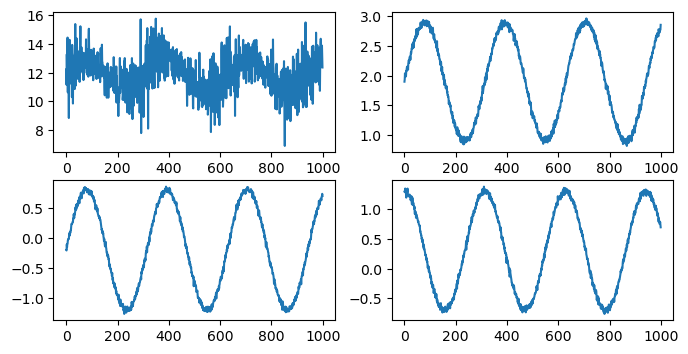

In [787]:
# Generate synthetic data based on the formula

# Time steps
T = 1000
t = np.linspace(0, 20, T)

# Transition matrix
A = np.array([[1,0,0.016],[0.025,0.94,0],[0,0.001,0.964]])

# Two covariance matrices
np.random.seed(70)
cov = np.array([[0.0351,0.0017,0],[0,0.0289,0.0002],[0.0004,0,0.0298]])
w_t = np.random.multivariate_normal([0, 0, 0], cov @ cov.transpose(), size=T)
v_t = np.random.normal(0, 0.1, size = T)

# Initialization with 0 
theta = np.zeros((T,3))
theta[0,:] = np.array([1.9,-0.2,0.3]) 

# Initialization with sin and cos
theta[:,0] = theta[0,0] + np.sin(t)
theta[:,1] = theta[0,1] + np.sin(t)
theta[:,2] = theta[0,2] + np.cos(t)

x_t = sm.add_constant(np.random.normal(size=(T,2)))
y_t = np.zeros(T)
y_t[0] = x_t[0,:] @ theta[0,:] + 10 + v_t[0]

# Iterative generation
for t in range(1,T):
    # theta[t,:] = A @ theta[t-1,:] + w_t[t,:]
    theta[t,:] +=  w_t[t,:]
    y_t[t] = x_t[t,:] @ theta[t,:] + 10 + v_t[t]

# Prepare the traning and testing data
index = 700
X_train, X_test = x_t[:index,:], x_t[index:,:]
y_train, y_test = y_t[:index], y_t[index:] 


plt.rcParams['figure.figsize'] = (8,4)
fig, axes = plt.subplots(2,2)
axes[0,0].plot(y_t)
axes[0,1].plot(theta[:,0])
axes[1,0].plot(theta[:,1])
axes[1,1].plot(theta[:,2])

In [28]:
res = sm.OLS(y_train, X_train).fit()
ytrhat_ols = res.predict(X_train)
ytehat_ols = res.predict(X_test)
print('OLS train rmse %.4f, test rmse %.4f' % (rmse(y_train, ytrhat_ols),rmse(y_test, ytehat_ols)))
print('OLS train mae %.4f, test mae %.4f' % (mae(y_train, ytrhat_ols),mae(y_test, ytehat_ols)))

k_states = X_train.shape[1]
params = Parameters(
        init_theta = np.zeros((k_states, 1)),
        # init_theta=res.params[:,None],
        init_P = np.diag([1]*k_states), 
        A = np.eye(k_states),
        Q = np.diag([0.0005]*k_states),
        R = 0.1)
start_time = time.time()
results, likelihood = EMalgorithm(X_train, y_train, 10, params)
end_time = time.time()
print("Running time : %.4f" % (end_time-start_time))

KF = KalmanFilter(X_train, y_train, results)
ytehat_off = X_test @ KF.filter[:,-1]
EM_results = KF_OnlinePredict(X_test, y_test, results.Q, results.R, KF)
ytrhat_em = KF.pred
ytehat_em = EM_results[0]
print('EM train rmse %.4f, test rmse %.4f' % (rmse(y_train, ytrhat_em),rmse(y_test, ytehat_em)))
print('EM train mae %.4f, test mae %.4f' % (mae(y_train, ytrhat_em),mae(y_test, ytehat_em)))
print('Off rmse %.4f, Off mae %.4f' % (rmse(y_test, ytehat_off),mae(y_test, ytehat_off)))
data = {'Observations': y_test, 'LDS': ytehat_em, 'LDS Off': ytehat_off, 'OLS': ytehat_ols}
df_result = pd.DataFrame(data)
relative_path = os.path.join(os.getcwd(), 'Variables', 'Debutanizer-MV1.csv')
# relative_path = os.path.join(os.getcwd(), 'Variables', 'MeltIndex-MV1.csv')
# relative_path = os.path.join(os.getcwd(), 'Variables', 'Sulfur-MV1.csv')
df_result.to_csv(relative_path, index=False)



OLS train rmse 0.1373, test rmse 0.1958
OLS train mae 0.0933, test mae 0.1660
True True
------- Loglikelihood of No. 1 iteration -------
Total: 56238.60, Init: 1.85, Q: 52944.35, R: 3292.40

True True
------- Loglikelihood of No. 2 iteration -------
Total: 57763.15, Init: 13.24, Q: 53223.55, R: 4526.36

True True
------- Loglikelihood of No. 3 iteration -------
Total: 58989.64, Init: 15.68, Q: 53645.79, R: 5328.16

True True
------- Loglikelihood of No. 4 iteration -------
Total: 60089.49, Init: 17.23, Q: 54174.58, R: 5897.68

True True
------- Loglikelihood of No. 5 iteration -------
Total: 61125.85, Init: 18.36, Q: 54770.72, R: 6336.77

True True
------- Loglikelihood of No. 6 iteration -------
Total: 62122.16, Init: 19.26, Q: 55406.80, R: 6696.10

True True
------- Loglikelihood of No. 7 iteration -------
Total: 63087.79, Init: 20.01, Q: 56065.24, R: 7002.54

False False
------- Loglikelihood of No. 8 iteration -------
Total: 64026.87, Init: 20.67, Q: 56734.68, R: 7271.52

False Fal

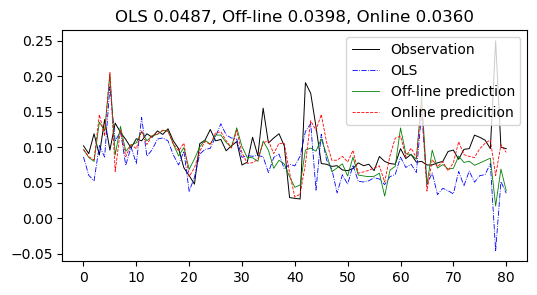

In [23]:
plt.rcParams['figure.figsize'] = (6,3)
fig, axes = plt.subplots()
axes.plot(y_test, 'k-', linewidth=0.7, label='Observation')
axes.plot(ytehat_ols, 'b-.', linewidth=0.6, label='OLS')
axes.plot(ytehat_off, 'g', linewidth=0.6, label='Off-line prediction')
axes.plot(ytehat_em, 'r--', linewidth=0.6, label='Online predicition')
axes.set_title('OLS %.4f, Off-line %.4f, Online %.4f' % (rmse(y_test, ytehat_ols),
               rmse(y_test, ytehat_off),rmse(y_test, ytehat_em)))
axes.legend()

In [26]:
print('EM train rmse %.4f, train mae %.4f ' % (rmse(y_train, ytrhat_em),mae(y_train, ytrhat_em)))
print('EM test rmse %.4f, test mae %.4f' % (rmse(y_test, ytehat_em),mae(y_test, ytehat_em)))

EM train rmse 0.0385, train mae 0.0251 
EM test rmse 0.0360, test mae 0.0213


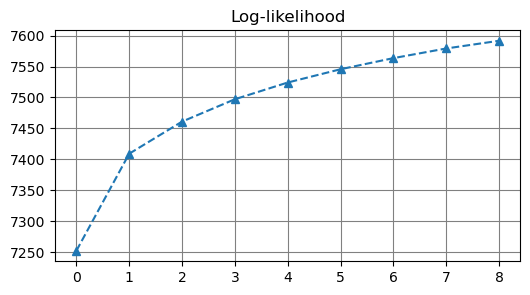

In [266]:
plt.plot(range(len(likelihood)),likelihood,'^--')
plt.title('Log-likelihood')
plt.grid(color='gray',axis='both')

Text(0.5, 0, 'Time index')

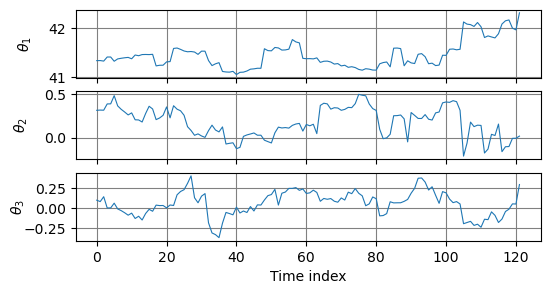

In [274]:
fig, axes = plt.subplots(3,1,sharex=True)

# axes[0].plot(theta[index:,0], linewidth=0.8, label='True state')
axes[0].plot(range(122),EM_results[2][0,:], linewidth=0.8, label='With EM')
# axes[0].plot(Init_results[2][0,:]-10, linewidth=0.8, label='W/o EM')
axes[0].set_axisbelow(True)
axes[0].grid(color='gray',axis='both')
axes[0].set_ylabel(r'${\theta}_{1}$', labelpad=10)
# axes[0].legend(loc='upper center', bbox_to_anchor=(0.5 - 0.4 / 2, 1.45, 0.4, 0), frameon=False, ncol=3)


# axes[1].plot(theta[index:,1], linewidth=0.8, label='True state 1')
axes[1].plot(range(122),EM_results[2][1,:], linewidth=0.8, label='EM filtered 1')
# axes[1].plot(Init_results[2][1,:], linewidth=0.8, label='Non-EM state 1')
axes[1].set_axisbelow(True)
axes[1].grid(color='gray',axis='both')
axes[1].set_ylabel(r'${\theta}_{2}$', labelpad=10)

# axes[2].plot(theta[index:,2], linewidth=0.8, label='True state 2')
axes[2].plot(range(122),EM_results[2][2,:], linewidth=0.8, label='EM filtered 2')
# axes[2].plot(Init_results[2][2,:], linewidth=0.8, label='Non-EM state 1')
axes[2].set_axisbelow(True)
axes[2].grid(color='gray',axis='both')
axes[2].set_ylabel(r'${\theta}_{3}$', labelpad=-3)
axes[2].set_xlabel('Time index')
# plt.savefig('LDS-Coef-sin.png', bbox_inches='tight')


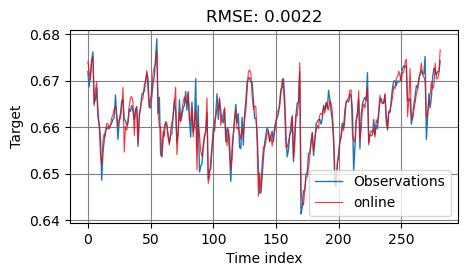

In [24]:
plt.rcParams['figure.figsize'] = (5,2.5)

fig, axes = plt.subplots()
start = 0

# axes.grid(color='gray',axis='both')
# axes.plot(y_test[start:], linewidth=1, label='Observations')
# axes.plot(ytehat_ols[start:], 'r', linewidth=0.8, alpha=0.8, label='OLS')
# axes.set_xlabel('Time index')
# axes.set_ylabel('Target')
# axes.set_title('RMSE: %.4f' % rmse(y_test,ytehat_ols))
# # axes.set_title('OLS')
# axes.legend()

# axes.grid(color='gray',axis='both')
# axes.plot(y_test[start:], linewidth=1, label='Observations')
# axes.plot(ytehat_off[start:], 'r', linewidth=0.8, alpha=0.8, label='offline')
# # axes.set_ylim([6,16])
# axes.set_xlabel('Time index')
# axes.set_ylabel('Target')
# axes.legend()
# axes.set_title('RMSE: %.4f' % rmse(y_test,ytehat_off))
# # axes.set_title('Off line KF')

# axes.grid(color='gray',axis='both')
# axes.plot(y_test[start:], linewidth=1, label='Observations')
# axes.plot(ytehat_init[start:], 'r', linewidth=0.8, alpha=0.8, label='w/o EM')
# # axes.set_ylim([6,16])
# axes.set_xlabel('Time index')
# axes.set_ylabel('Target')
# axes.legend()
# axes.set_title('RMSE: %.4f' % rmse(y_test,ytehat_init))
# axes.set_title('Online KF w/o EM')

axes.grid(color='gray',axis='both')
axes.plot(y_test[start:], linewidth=1, label='Observations')
axes.plot(ytehat_em[start:], 'r', linewidth=0.8, alpha=0.8, label='online')
# axes.set_ylim([6,16])
axes.set_xlabel('Time index')
axes.set_ylabel('Target')
axes.set_title('RMSE: %.4f' % rmse(y_test,ytehat_em))
axes.legend()
# axes.set_title('Online KF with EM')
# plt.tight_layout()
plt.savefig('LDS-sin-pre-ols.png', bbox_inches='tight')

# axes[0,0].set_title('OLS %.4f, Off %.4f, w/o EM %.4f, EM %.4f' % 
#                     (rmse(y_test, ytehat_ols),rmse(y_test,ytehat_off),
#                      rmse(y_test, ytehat_init),rmse(y_test, ytehat_em)))

Estiamted theta 37.83
OLS solution 40.64


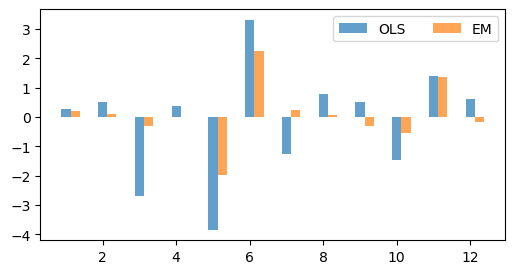

In [268]:
# print('True theta', theta[0,:])
print('Estiamted theta', results.theta0[0,0].round(2))
print('OLS solution', res.params[0].round(2))
bar1 = [x for x in range(1,13)]
plt.bar(bar1, results.theta0[1:,0],label='OLS', width=0.25,alpha=0.7)
plt.bar([x+0.25 for x in bar1], res.params[1:],label='EM', width=0.25,alpha=0.7)
plt.legend(ncol=2)

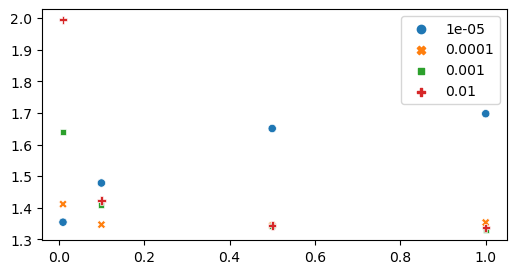

In [306]:
offline_table=np.array([[1.3546, 1.4117, 1.6388, 1.9947],
                        [1.4785, 1.3469, 1.4087, 1.4231],
                        [1.6509, 1.3435, 1.3425, 1.3446],
                        [1.6977, 1.3537, 1.3306, 1.3367]])
online_table=np.array([[1.3121, 1.3493, 1.5292, 2.0451],
                       [1.3343, 1.2966, 1.4106, 1.7415],
                       [1.3550, 1.2894, 1.3857, 1.6787],
                       [1.3623, 1.2871, 1.3818, 1.6712]])
offline_table=pd.DataFrame(data=offline_table, index=[0.01, 0.1, 0.5, 1],
                           columns=[1e-5, 1e-4, 1e-3, 1e-2])
online_table=pd.DataFrame(data=online_table, index=[0.01, 0.1, 0.5, 1],
                           columns=[1e-5, 1e-4, 1e-3, 1e-2])
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
# for j in [1e-5, 1e-4, 1e-3, 1e-2]:
#     for i in [0.01, 0.1, 0.5, 1]:
#         ax.scatter(i, j, offline_table[j][i], c=(offline_table[j][i]-offline_table.min().min())/(offline_table.max().max()-offline_table.min().min()), cmap='gray')

sns.scatterplot(data=offline_table)
plt.show()

In [303]:
offline_table.min().min()

1.3306

In [290]:
offline_table[0.0001][0.01]

1.4117

In [116]:
print('True R', 0.01, '\n', 'Estimated R', results.R[0], '\n' )
print('\n', 'Estimated Q\n', results.Q, '\n Estimated norm of Q', np.linalg.norm(results.Q))
print('\n', 'OLS Q', res.model.normalized_cov_params, '\nOLS norm Q', np.linalg.norm(res.model.normalized_cov_params))

True R 0.01 
 Estimated R [0.58491282] 


 Estimated Q
 [[ 1.08265676e-04 -1.00178137e-06  6.95481412e-06  9.22689034e-07
  -2.51419735e-06 -2.42459054e-06 -2.18577327e-06 -6.17293818e-06
  -4.71162217e-07  4.43426531e-06  4.84380850e-06  4.05274956e-06
  -3.75059358e-06]
 [-1.00619433e-06  1.00938387e-04 -1.69079191e-06  7.03099844e-07
   2.77511595e-07 -1.58178354e-06 -1.41329060e-06  3.05511948e-06
   6.09498424e-07 -8.78834247e-07 -6.94530419e-07 -1.09122508e-06
   4.59854784e-07]
 [ 6.97369900e-06 -1.70065805e-06  1.05363102e-04 -6.59517220e-07
   5.14949175e-07  2.08613743e-06  1.67726137e-06 -7.14303954e-06
  -8.95026460e-07  1.52766419e-06  7.79668265e-07  2.35948500e-06
  -3.81123724e-06]
 [ 9.26131776e-07  6.90511807e-07 -6.52307236e-07  1.00035736e-04
  -1.71910595e-06 -2.70893637e-06 -2.55303350e-06  2.45723140e-06
   8.04991193e-07  1.32010466e-06  2.13917423e-06  1.05646075e-06
   5.67819996e-07]
 [-2.52391586e-06  2.86517051e-07  5.09452781e-07 -1.71908305e-06
   1.01253

Text(0.5, 0, 'Samples')

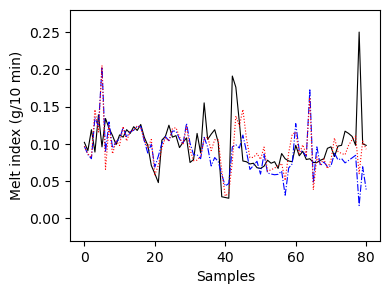

In [25]:
# plt.rcParams['figure.figsize'] = (4,2.5)
# fig, axes = plt.subplots(3,1,sharex=True)
plt.style.use('default')
fig, axes = plt.subplots(figsize=(4,3))
axes.plot(y_test, 'k-', linewidth=0.8, label='Measurements')
axes.plot(ytehat_off, 'b-.', linewidth=0.8, label='Offline prediction')
axes.plot(ytehat_em, 'r:', linewidth=0.8, label='Online prediction')
# axes.set_ylabel('Butane content (%)')
axes.set_ylabel('Melt index (g/10 min)')
# axes.set_ylabel(r'Residuals (mol/m$^3$)')
axes.set_ylim(-0.03,0.28)
# axes.set_ylim(-0.25,0.25)
axes.set_xlabel('Samples')
# axes.legend()
# relative_path = os.path.join(os.getcwd(), 'Figures', 'MIM1.png')
# plt.savefig(relative_path, dpi=600, bbox_inches='tight')


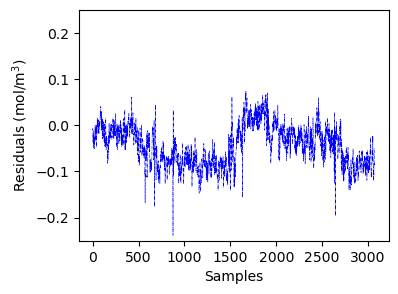

In [15]:
fig, axes = plt.subplots(figsize=(4,3))
# axes.plot(y_test, 'k-', linewidth=0.8, label='Measurements')
axes.plot(ytehat_ols-y_test, 'b-.', linewidth=0.4, label='Offline prediction')
# axes.set_ylabel('Butane content (%)')
# axes.set_ylabel('Melt index (g/10 min)')
axes.set_ylabel(r'Residuals (mol/m$^3$)')
axes.set_xlabel('Samples')
axes.set_ylim(-0.25,0.25)
# axes.legend()
relative_path = os.path.join(os.getcwd(), 'Figures', 'SulfurOLS.png')
plt.savefig(relative_path, dpi=600, bbox_inches='tight')